# Examples of running the rolling ball optimizer on synthetic loss functions

This notebooks demonstrates how the rolling ball optimizer can be used against some of the synthetic loss functions included in https://github.com/mohammedbelgoumri/milestone-d-2.5.

## The Weirstrass-like loss function

Defined in `examples/weirstrass.py`, the code for running the rolling ball optimizer on the Weirstrass-like loss function is as follows:

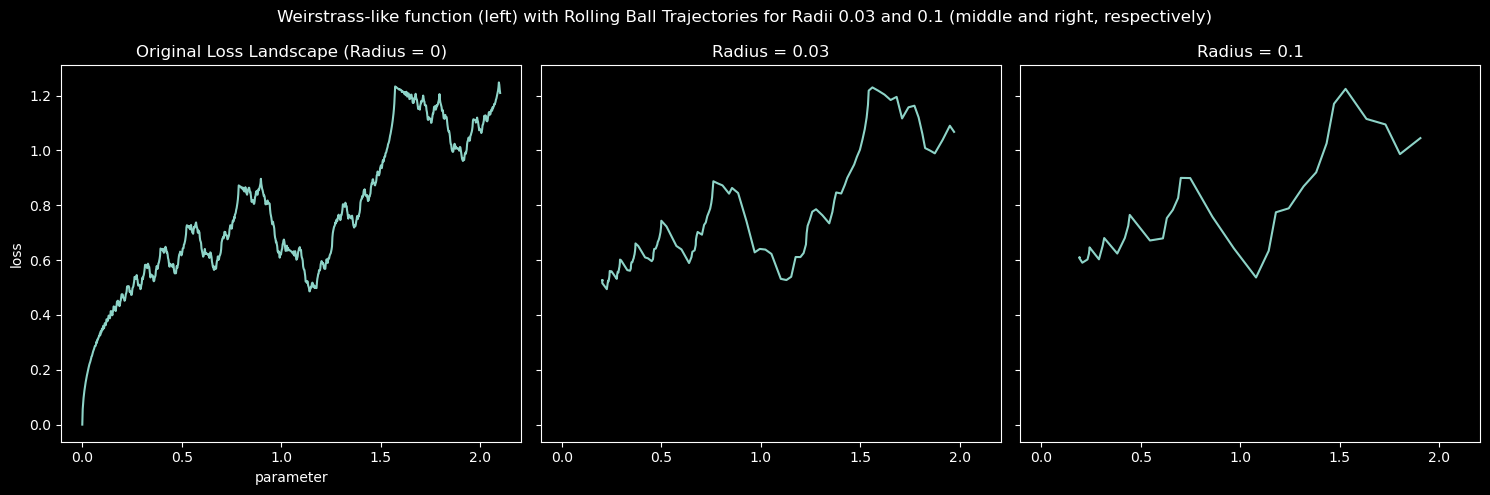

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from examples.weirstrass import grad_fn, loss_fn
from utilities.optim import rolling_ball_trajectory

x = np.linspace(0, 2.1, 1000)
y = loss_fn(x)


fig, ax = plt.subplots(ncols=3, figsize=(15, 5), sharey=True, sharex=True)
ax[0].plot(x, y)
ax[0].set_title("Original Loss Landscape (Radius = 0)")
ax[0].set_xlabel("parameter")
ax[0].set_ylabel("loss")

params, centers = rolling_ball_trajectory(
    value_and_grad_fn=lambda x: (loss_fn(x), grad_fn(x)),
    lr=1e-3,
    initial=2.0,
    radius=0.03,
    n_epochs=2000,
    n_projections=20,
    projection_step=0.05,
)
ax[1].plot(centers[:, 0], centers[:, 1])
ax[1].set_title("Radius = 0.03")

params, centers = rolling_ball_trajectory(
    value_and_grad_fn=lambda x: (loss_fn(x), grad_fn(x)),
    lr=1e-3,
    initial=2.0,
    radius=0.1,
    n_epochs=2000,
    n_projections=20,
    projection_step=0.05,
)
ax[2].plot(centers[:, 0], centers[:, 1])
ax[2].set_title("Radius = 0.1")

fig.suptitle(
    "Weirstrass-like function (left) with Rolling Ball Trajectories for Radii 0.03 and 0.1 (middle and right, respectively)"
)
plt.tight_layout()
plt.show()

## The Gaussian MSE loss function

Defined in `examples/gaussian.py`, the code for running the rolling ball optimizer on the Gaussian MSE loss function is as follows:

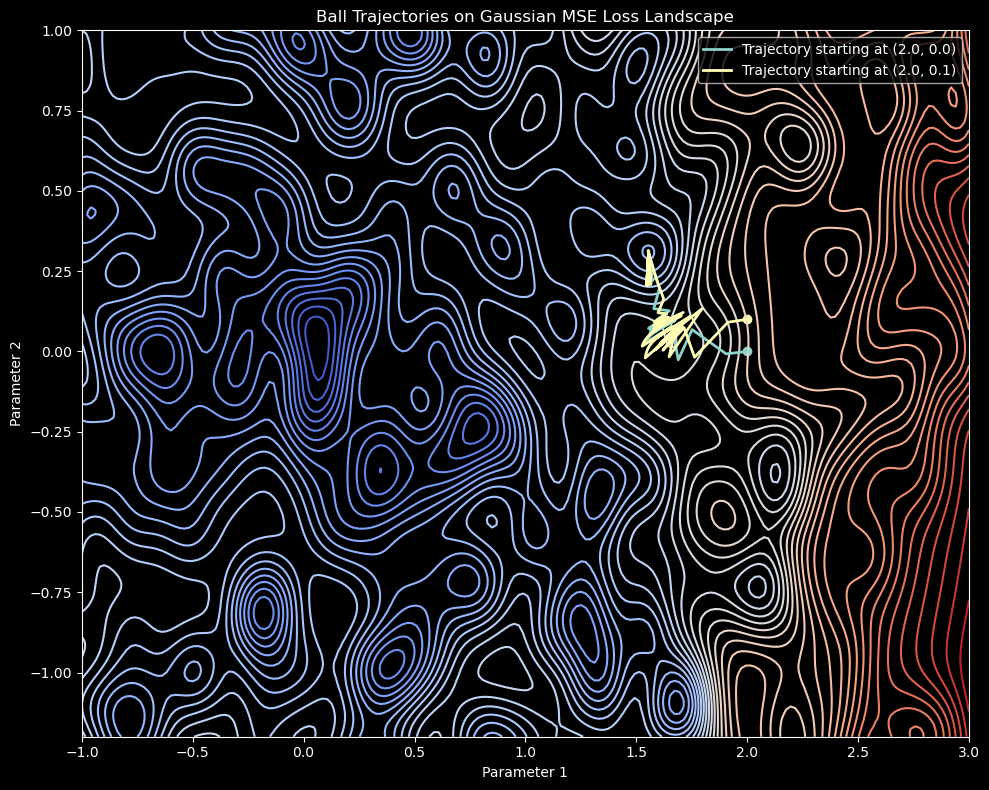

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, random, vmap

from examples.gaussian import gaussian_mse_loss_fn
from utilities.optim import ball_trajectory

key = random.PRNGKey(0)
key, subkey = random.split(key)
minima = random.uniform(subkey, shape=(1000, 2), minval=-3.0, maxval=3.0)


def loss_fn(theta):
    return gaussian_mse_loss_fn(theta, minima)


grad_fn = grad(loss_fn)

traj1 = ball_trajectory(
    loss_fn,
    jnp.array([2.0, 0.0]),
    radius=1.5,
    n_steps=300,
    learning_rate=0.01,
    projection_step_size=1e-3,
    n_projection_steps=100,
)

traj2 = ball_trajectory(
    loss_fn,
    jnp.array([2.0, 0.1]),
    radius=1.5,
    n_steps=300,
    learning_rate=0.01,
    projection_step_size=1e-3,
    n_projection_steps=100,
)


X, Y = jnp.meshgrid(jnp.linspace(-1, 3, 200), jnp.linspace(-1.2, 1, 200))
Z = vmap(loss_fn)(jnp.stack([X.ravel(), Y.ravel()], axis=-1)).reshape(X.shape)

fig = plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, cmap="coolwarm", levels=40)
plt.plot(*zip(*traj1), linewidth=2, label="Trajectory starting at (2.0, 0.0)")
plt.plot(*zip(*traj2), linewidth=2, label="Trajectory starting at (2.0, 0.1)")
plt.scatter(2, 0)
plt.scatter(2, 0.1)
plt.legend()
plt.title("Ball Trajectories on Gaussian MSE Loss Landscape")

plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")

plt.tight_layout()
plt.show()
